### Imports

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

### Load data

In [2]:
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [3]:
# Separate features and target variable
X = df.drop(columns=['Country', 'Region', 'Year', 'Life_expectancy'])
y = df['Life_expectancy']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train set with target variable
X_train_with_target = pd.concat([X, y], axis=1)

X.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1
1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0
2,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1
3,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1
4,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0


## Data validation 

In [4]:
# Check for duplicate rows
duplicate = df.duplicated()
print("Number of duplicate rows:", duplicate.sum())

Number of duplicate rows: 0


In [5]:
# Check for missing values
nan_values = df.isna()
nan_values.sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [6]:
# Check for negative values in numerical columns
negative_values = (df.select_dtypes(include='number') < 0)
negative_values.sum()

Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [7]:
# Check for values greater than 100 and less than 0 in columns given in percentage
percentage_values = (df[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']] > 100) | (df[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']] < 0)
print("Values greater than 100 or less than 0 in percentage columns:", percentage_values.sum())

Values greater than 100 or less than 0 in percentage columns: Hepatitis_B    0
Measles        0
Polio          0
Diphtheria     0
dtype: int64


In [8]:
# Check for any rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1
mutual_status_count = df[(df['Economy_status_Developed'] == 1) &
                                 (df['Economy_status_Developing'] == 1)].shape[0]

# Check for rows where both values are 0
neither_status_count = df[(df['Economy_status_Developed'] == 0) &
                                  (df['Economy_status_Developing'] == 0)].shape[0]

print(f"Rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1: {mutual_status_count}")
print(f"Rows where both are 0: {neither_status_count}")

Rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1: 0
Rows where both are 0: 0


## Exploratory Data Analysis

### _Exploring data_

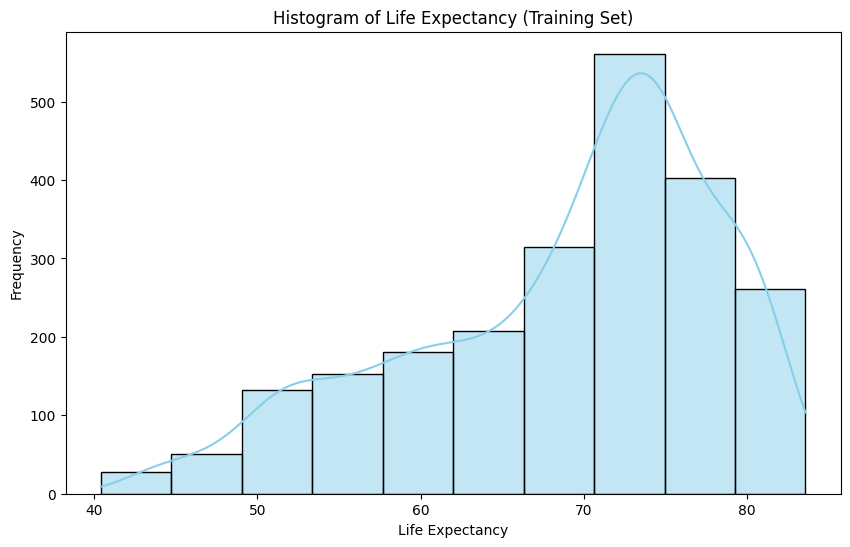

In [9]:
# Plot a histogram for 'Life_expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Life Expectancy (Training Set)")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

### _Categorical variables_

C:\Users\Malin Haugland Høli\AppData\Local\Temp\ipykernel_16924\1190865074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train_with_target, x='Economy_status_Developed', y='Life_expectancy', palette=plot_colors)


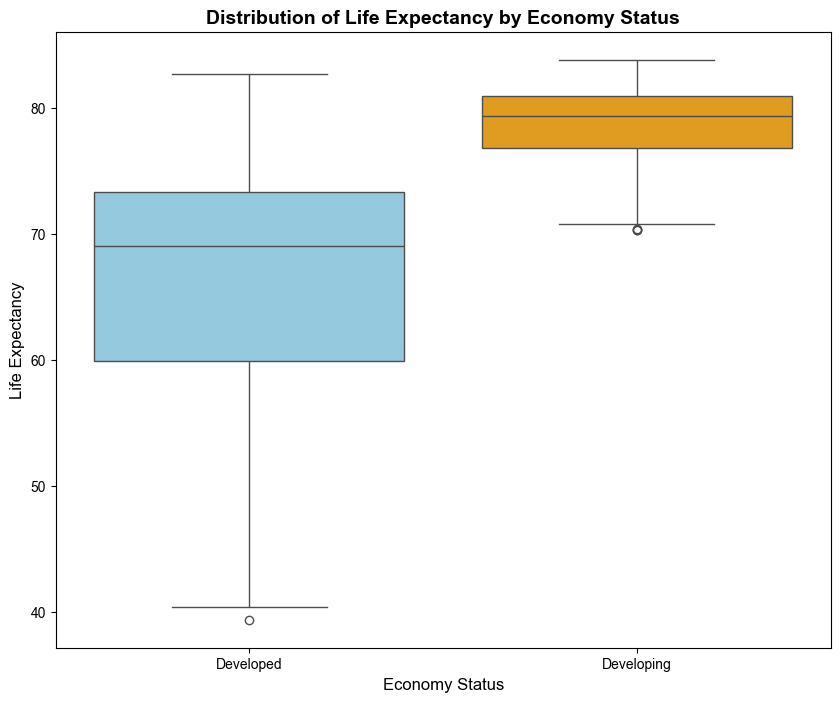

In [10]:
plot_colors = ['skyblue', 'orange']

# Create the plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train_with_target, x='Economy_status_Developed', y='Life_expectancy', palette=plot_colors)

# Add titles and labels
plt.title("Distribution of Life Expectancy by Economy Status", fontsize=14, fontweight='bold', ha='center')
plt.xlabel("Economy Status", fontsize=12)

# if x label is 0, then write 'Developing', else write 'Developed'
plt.xticks([1, 0], ['Developing', 'Developed'])

plt.ylabel("Life Expectancy", fontsize=12)

# Apply minimal theme styling
sns.set_theme(style="whitegrid")

# Show the plot
plt.show()

### _Continious Variables_

### _Heatmap_

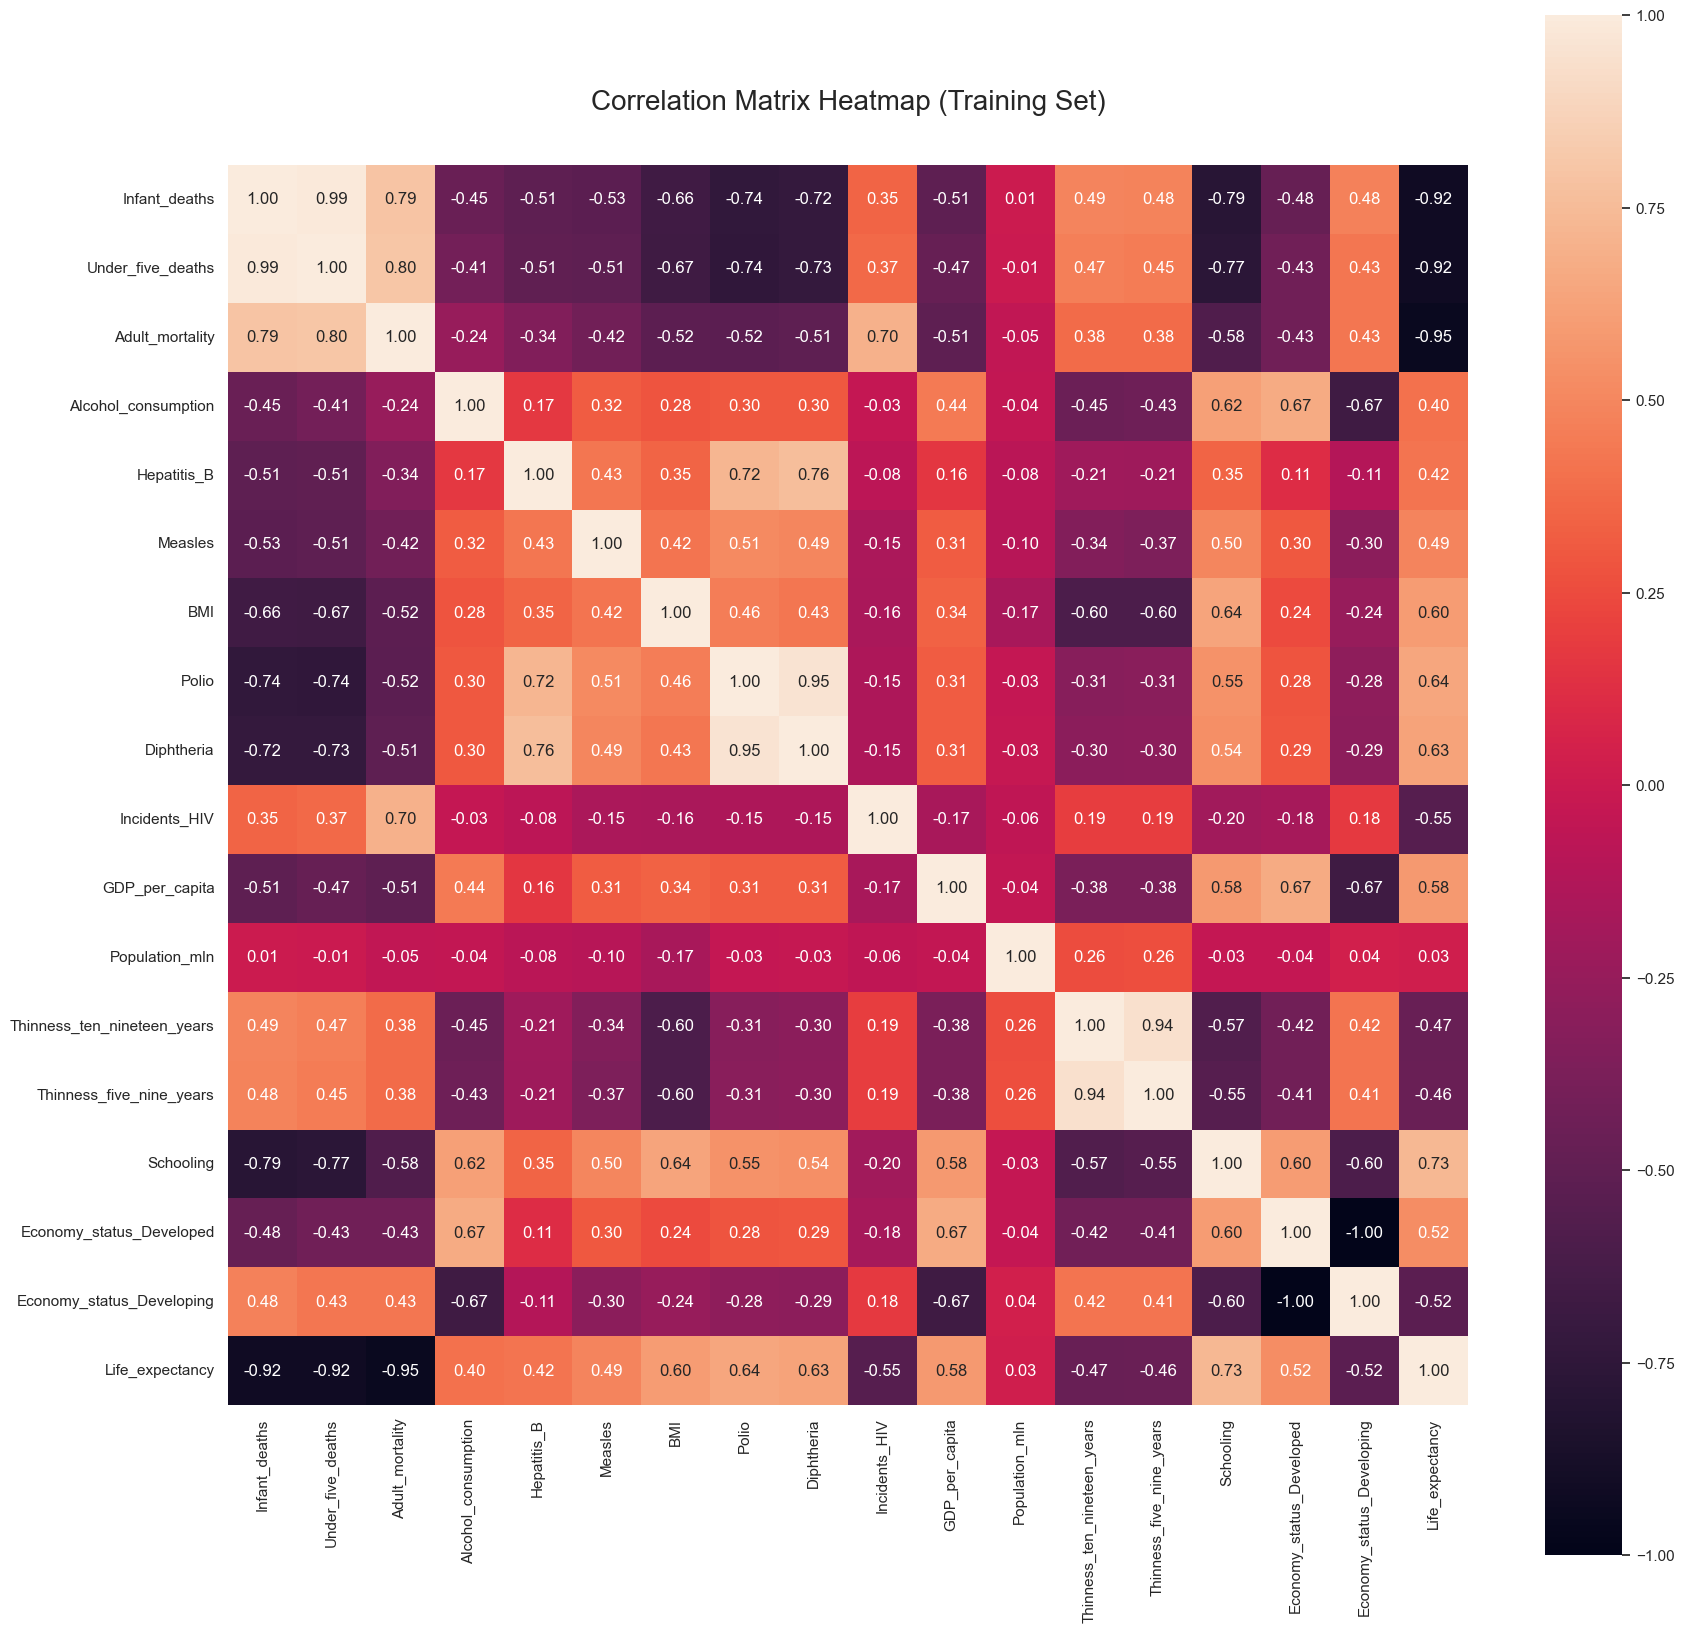

In [11]:
# Create a correlation matrix heatmap
# 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation
correlation_matrix = X_train_with_target.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Training Set)', fontsize=20, pad=40)
plt.show()

### _Studying correlations_

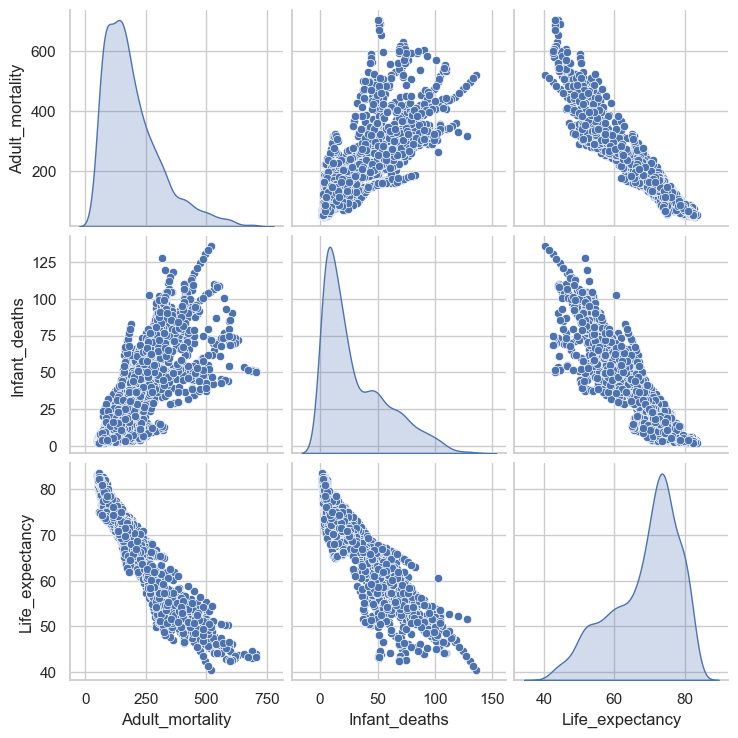

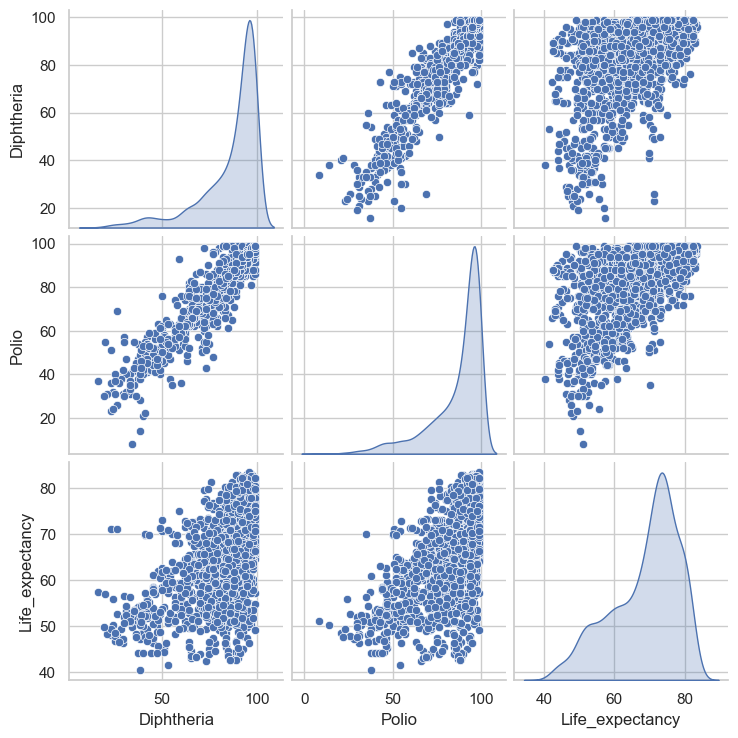

In [12]:
# Create scatter matrix (pairplot) of numerical columns, compared to 'Life_expectancy'
train_data_with_target = X_train[['Adult_mortality', 'Infant_deaths']].copy()
train_data_with_target['Life_expectancy'] = y_train

sns.pairplot(train_data_with_target, diag_kind='kde', markers='o')
plt.show()

# Create scatter matrix (pairplot) of numerical columns, compared to 'Life_expectancy'
train_data_with_target = X_train[['Diphtheria', 'Polio']].copy()
train_data_with_target['Life_expectancy'] = y_train

sns.pairplot(train_data_with_target, diag_kind='kde', markers='o')
plt.show()


### _VIF Scores to study colinearity_

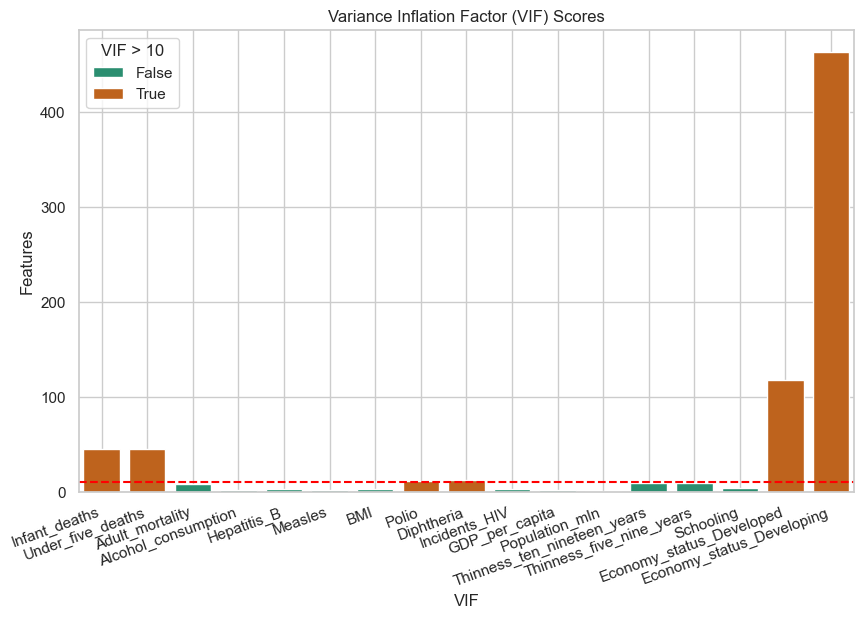

In [13]:
# Calculate the Variance Inflation Factor (VIF) for each feature to check for multicollinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Plot VIF scores
def plot_vif(vif_scores):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature', y='VIF', data=vif_scores, palette='Dark2', hue=vif_scores['VIF'] > 10)
    plt.axhline(y=10, color='red', linestyle='--')
    plt.title('Variance Inflation Factor (VIF) Scores')
    plt.xlabel('VIF')
    plt.xticks(rotation=20, ha='right')
    plt.ylabel('Features')
    plt.legend(title='VIF > 10')
    plt.grid(True)
    plt.show()

plot_vif(calculate_vif(X))

### Select K Best for selecting features

In [15]:
# SelectKBest with f_regression as scoring function, as this is the most suitable since Life_expectancy is a continuous variable
skb = SelectKBest(f_regression, k=5)
skb.fit(X_train, y_train)
X_train_selected = skb.transform(X_train)
X_test_selected = skb.transform(X_test)

selected_features = X_train.columns[skb.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Polio',
       'Schooling'],
      dtype='object')
